#  Principal Component Analysis

|-|continuous|categorical|
|---|---|---|
|**supervised**|regression|classification|
|**unsupervised**|**dimension reduction**|clustering|

###### supervised -> target is available
###### unsupervised -> target is not available(just use the picture)
###### clustering use the group into make category

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data.
Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA).
PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points:

In [32]:
#random state
rng = np.random.RandomState(1)

#generate random number with the shapes 4 x 4, for 200 data and 4 arrays. And, transpose the four arrays into four columns
X = np.dot(rng.rand(4, 4),rng.randn(4, 200)).T # 4 * 4 matrix & 4 * 200 matrix 곱하기  => 4(rows) * 200(columns) data 나옴
# dot : multiplication
# T : transpose(We want to transpose)-> 4(columns) * 200(rows)로 바꿔줌 
#print the first 10 data
X[:10]
# 이거 final exam에 나옴

array([[ 0.47646625,  0.2484785 ,  0.51716154,  0.23060596],
       [-1.52128006,  0.30504646,  0.01190604, -0.86803368],
       [ 0.90586329,  0.65479191,  1.74846315,  1.48731833],
       [-0.7836648 , -0.35157037, -0.94941474, -1.04099104],
       [-1.00645607, -1.06949338, -2.56110578, -2.22449163],
       [-0.10475654, -0.72796639, -1.33689711, -0.11823137],
       [ 0.74743224,  0.31073713,  0.78089059,  1.31225537],
       [-0.9977899 , -0.32522153, -0.83682345, -1.23723139],
       [ 1.27824167,  0.47594941,  1.46438863,  1.8002445 ],
       [ 0.15065169, -0.50424622, -0.99672618, -0.23543116]])

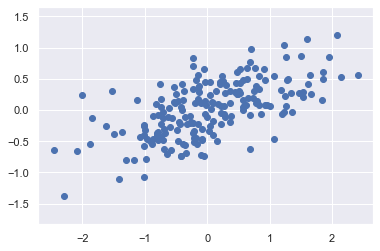

In [33]:
#plot the column 0 and 1
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression data we explored in previous section, but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.(x 값에서 y 값을 예측하려고 시도하기보다는 x 값과 y 값의 관계에 대해 배우려고 한다.)

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # X가 2개였기 때문에(X[:0],X[:1])
pca.fit(X) # -> 200 rows, 4 columns(I want to reduce 4 to 2(the most important component) columns)
# PCA : relationship between X and Y

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [35]:
print(pca.components_) # pca 주성분

[[-0.46551125 -0.20831427 -0.58461456 -0.63097564]
 [ 0.50069297 -0.4712601  -0.62664449  0.36679306]]


In [36]:
print(pca.explained_variance_)
# 4 column to 2 column으로 바꾼 것
# variance가 big : 큰 값

[3.26454421 0.25707152]


In [37]:
#The two components contain 0.90(first column variance)-> showing better variance + 0.07(second column variance) = 0.97 (97%) of the information.
print(pca.explained_variance_ratio_)

[0.90914162 0.07159175]


These vectors represent the *principal axes* of the data, and the length of the vector is an indication of how "important" that axis is in describing the distribution of the data—more precisely, it is a measure of the variance of the data when projected onto that axis.
The projection of each data point onto the principal axes are the "principal components" of the data.(이러한 벡터는 데이터의 주요 축을 나타내며, 벡터의 길이는 그 축이 데이터의 분포를 설명함에 있어서 얼마나 "중요"한지 나타내는 것이다. 더 정확히 말하면, 그것은 그 축에 투영되었을 때의 데이터 분산의 척도인 것이다. 각 데이터 점을 주 축에 투영하는 것은 데이터의 "주요 구성요소"이다.)

If we plot these principal components beside the original data, we see the plots shown here:

![](figures/09.01-PCA-rotation.png)

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [38]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 4)
transformed shape: (200, 2)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

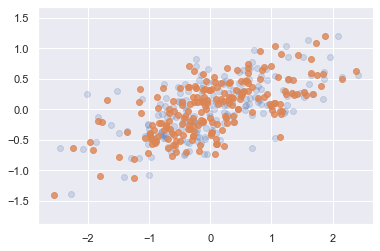

In [39]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2) # alpha : transparency # column 0 and column 1
# original data
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
# transformed data(at least similar original)
plt.axis('equal');
# By using the PCA, you can use the new data(because new data-2 columns(2 features) more less thean old data-4columns)
# data is similar with original(transformed data 0,1column이 비슷)

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.(이를 통해 PCA 차원성 감소의 의미를 명확히 할 수 있다. 즉, 가장 중요하지 않은 주 축이나 축을 따라 정보가 제거되고 데이터의 구성 요소만 가장 높은 분산을 남긴다. 잘라내는 분산의 분율(이 그림에서 형성된 선에 대한 점의 분포에 비례함)은 대략 이러한 차원성의 감소에서 얼마나 많은 "정보"가 버려지는가를 나타내는 척도다.)

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.(데이터의 치수를 50%까지 줄였음에도 불구하고 데이터 포인트 사이의 전체적인 관계는 대부분 보존)

# PCA in Iris Dataset

In [40]:
# dimension reduction(reduce column to 2,3,4)

PCA for Data Visualization

For a lot of machine learning applications it helps to be able to visualize your data. Visualizing 2 or 3 dimensional data is not that challenging. However, even the Iris dataset used in this part of the section is 4 dimensional. You can use PCA to reduce that 4 dimensional data into 2 or 3 dimensions so that you can plot and hopefully understand the data better.

In [41]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target']) # put the column name
# 위 link가면 숫자 data 알 수 있음

In [42]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

<font size="5">$z = \frac{x_{i} - \mu}{ \sigma}$</font> 

If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

get the normalized value

In [43]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values # array # feature에 있는 값 반환
# Separating out the target
y = df.loc[:,['target']].values # array # 'target' attribute에 있는 값 반환

In [44]:
# x
# y

In [45]:
# Standardizing the features
x = StandardScaler().fit_transform(x)
# if they have different unit, you need to transform (into StandardScaler) to do PCA

![](figures/09.01.iris-normalize.png)

### PCA Projection to 2D

The original data has 4 columns (sepal length, sepal width, petal length, and petal width). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [46]:
from sklearn.decomposition import PCA # 분해(decomposition)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

![](figures/09.01.iris-projection.png)

Concatenating DataFrame along axis = 1. finalDf is the final DataFrame before plotting the data.

In [47]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf
# concat :combine
# principalDf combined with the new column which is the target

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
...,...,...,...
145,1.870522,0.382822,Iris-virginica
146,1.558492,-0.905314,Iris-virginica
147,1.520845,0.266795,Iris-virginica
148,1.376391,1.016362,Iris-virginica


![](figures/09.01.iris-concat.png)

In [48]:
# finalDf로 classification, clustering 할 수 있음

Visualize 2D Projection

This section is just plotting 2 dimensional data. Notice on the graph below that the classes seem well separated from each other.

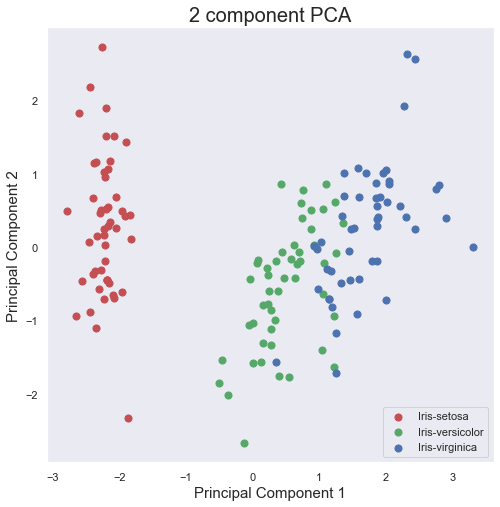

In [49]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b'] # red green blue
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target #'target'이름만 바꿔주기
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [50]:
# 4개의 column 중에 2개만 이용해서 clustering, classification 할 수있음

Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. Together, the two components contain 95.80% of the information.

설명되는 분산은 각 주성분에 귀속될 수 있는 정보(분산)의 양을 알려준다. 이는 4차원 공간을 2차원 공간으로 변환할 수 있지만, 이렇게 하면 분산(정보)이 일부 손실되기 때문에 중요하다. 설명_variance_ratio_ 속성을 사용하면 첫 번째 주성분은 분산의 72.77%를 포함하고 두 번째 주성분은 분산의 23.03%를 포함하고 있음을 알 수 있다. 두 구성 요소는 함께 95.80%의 정보를 포함하고 있다.

In [52]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

PCA to Speed-up Machine Learning Algorithms

One of the most important applications of PCA is for speeding up machine learning algorithms. Using the IRIS dataset would be impractical(비현실적,비실용적) here as the dataset only has 150 rows and only 4 feature columns. You can try to run the MNIST Database. The MNIST database of handwritten digits is more suitable as it has 784 feature columns (784 dimensions), a training set of 60,000 examples, and a test set of 10,000 examples.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to the digits data we saw in [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb).

We start by loading the data:

In [53]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
# 64 columns / 1794 rows(=1794 data)

(1797, 64)

In [54]:
digits.data[0]
# 0 ; white 15 ; black
# higher number it shows more black
# depend density of the color

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [55]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

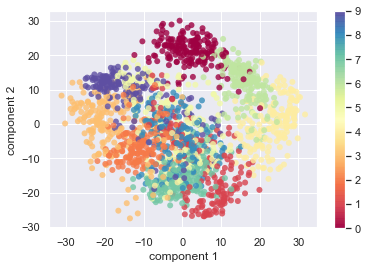

In [56]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.8,
            cmap=plt.cm.get_cmap('Spectral'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
# whether is 1,2,3,4,... -> target
# 9 is similar with,   ..( yellow 부분에 있음)

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.(이러한 성분의 의미를 상기하십시오. 전체 데이터는 64차원 점 구름이며, 이러한 점들은 분산이 가장 큰 방향을 따라 각 데이터 점의 투영이다. 본질적으로, 우리는 이 숫자의 레이아웃을 2차원으로 볼 수 있는 64차원 공간에서 최적의 스트레칭과 회전을 찾아냈고, 이것을, 즉 라벨을 참조하지 않고, 감독하지 않은 방식으로 했다.)

### What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:
(이 의미는 기본 벡터의 조합으로 이해할 수 있다. 예를 들어, 트레이닝 세트의 각 이미지는 64 픽셀 값의 집합에 의해 정의되며, 이를 벡터 𝑥)

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

![](figures/09.01-digits-pixel-components.png)

In [57]:
# 8 * 8 = 64(first picture)   

The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.Were we to continue this sequence and use all 64 pixels, we would recover the original image.(패널의 위쪽 행은 개별 픽셀을 나타내고, 아래쪽 행은 이러한 픽셀이 이미지 구성에 대한 누적 기여도를 나타낸다. 픽셀 기준 구성 요소 중 8개만 사용하여 64픽셀 영상의 일부만 구성할 수 있다. 만약 우리가 이 시퀀스를 계속하여 64픽셀을 모두 사용한다면, 우리는 원래의 이미지를 회복할 것이다.)


But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
This figure shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

![](figures/09.01-digits-pca-components.png)

In [58]:
# 3 or 4 component is enough to show digit 0 -> good for PCA(8 component까지 갈 필요 없음)

Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

(픽셀 기반과 달리 PCA 기반은 8개의 구성 요소만 더하면 입력 이미지의 두드러진 특징을 복구할 수 있다! 각 구성 요소에서 각 픽셀의 양은 우리의 2차원 예에서 벡터 방향의 윤곽선이다. 이는 PCA가 데이터의 저차원적 표현을 제공하는 감각이다. PCA는 입력 데이터의 기본 픽셀 기준보다 더 효율적인 기본 기능 집합을 발견한다.)

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

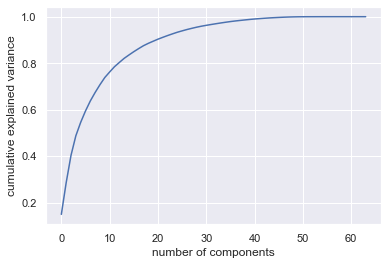

In [59]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) # 누적값계산 : cumsum
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [70]:
# What is best component 개수 ? 

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

이 곡선은 첫 번째 𝑁 성분 내에 포함된 64차원 분산의 양을 정량화한다. 예를 들어, 숫자로 처음 10개 성분은 분산의 약 75%를 포함하는 반면, 100%에 가까운 분산을 설명하는 데 약 50개의 성분이 필요하다는 것을 알 수 있다.

여기서 2차원 투영법은 (설명된 분산에 의해 측정된) 많은 정보를 손실하며, 분산의 90%를 유지하기 위해 약 20개의 성분이 필요하다는 것을 알 수 있다. 고차원 데이터 집합에 대한 이 그래프를 보면 다중 관측치에 존재하는 중복성의 수준을 이해하는 데 도움이 될 수 있다.

## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.
Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).
Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data.
For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components.
Scikit-Learn contains a couple interesting variants on PCA, including ``RandomizedPCA`` and ``SparsePCA``, both also in the ``sklearn.decomposition`` submodule.
``RandomizedPCA``, which we saw earlier, uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while ``SparsePCA`` introduces a regularization term that serves to enforce sparsity of the components.
